<a href="https://colab.research.google.com/github/V-kr0pt/ANN/blob/master/previsao_seno_ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão da função seno + ruído

Esse notebook é uma continuação do notebook previsao_seno e possui os mesmos objetivos lá apresentados. Porém, agora utilizaremos um dataset formado por 1000 pontos com ruído. 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data

In [ ]:
#Parâmetros
nsamples = 1000
test_ratio = 0.3
train_ratio = 1 - test_ratio
val_ratio = train_ratio * 0.2

#dataset
t = np.linspace(0, 2*np.pi, nsamples)
t_permuted = np.random.permutation(t)
y_permuted = np.sin(t_permuted) + 0.1*np.random.rand(nsamples)

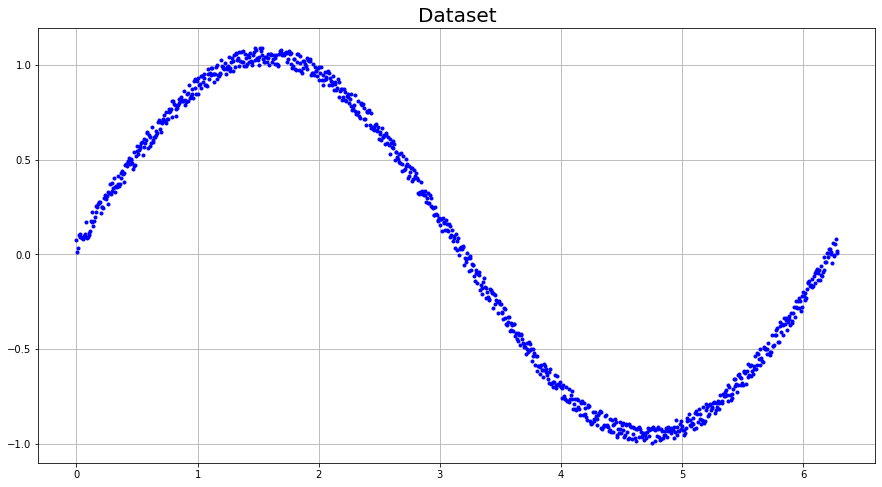

In [ ]:
#plotando o dataset
plt.figure(figsize=(15,8))
plt.title("Dataset", fontsize=20)
plt.plot(t_permuted, y_permuted, 'b.')
plt.grid()

In [ ]:
#dividindo em validação, treinamento e teste

#quantida de amostras de teste e de validação
val_samples = int(val_ratio * nsamples)
test_samples =  int(test_ratio * nsamples)

#divisão dos dados
Xva, Xts, Xtr = np.split(t_permuted, [val_samples, test_samples])
yva, yts, ytr = np.split(y_permuted, [val_samples, test_samples])

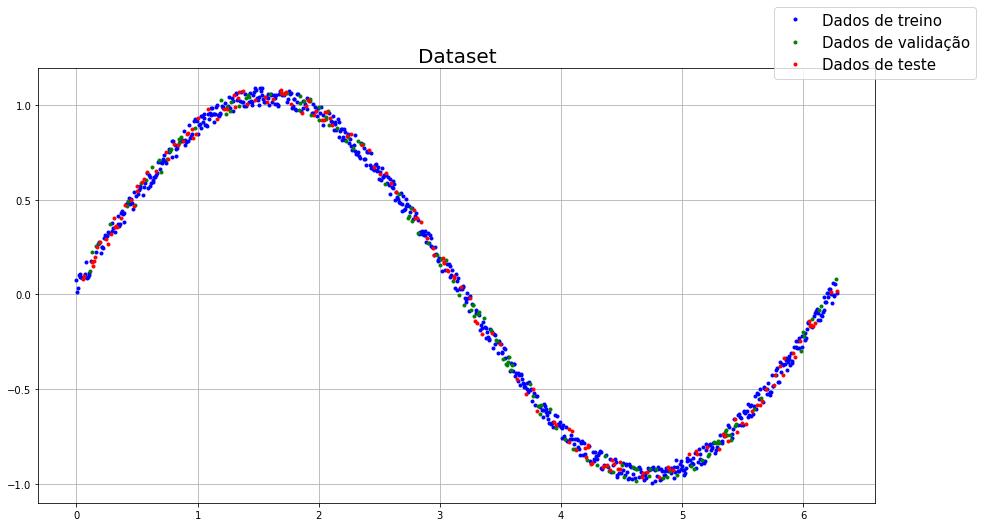

In [ ]:
#plotando divisão feita

fig_datadiv, ax_datadiv = plt.subplots(figsize=(15,8))
ax_datadiv.set_title("Dataset", fontsize=20)
ax_datadiv.plot(Xtr, ytr, 'b.', label="Dados de treino")
ax_datadiv.plot(Xva, yva, 'g.', label="Dados de validação")
ax_datadiv.plot(Xts, yts, 'r.', label="Dados de teste")
ax_datadiv.grid()
fig_datadiv.legend(fontsize=15)

## Model

In [ ]:
#criando modelo da RNA

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='tanh',input_shape=(1,)))
model.add(tf.keras.layers.Dense(16, activation='tanh'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
model.compile(loss='mse', metrics='mean_squared_error')

History = model.fit(Xtr,
                    ytr,
                    epochs = 1000,
                    validation_data = (Xva, yva) 
                    )


Epoch 1/1000
22/22 [==============================] - 1s 18ms/step - loss: 1.1531 - mean_squared_error: 1.1531 - val_loss: 0.5232 - val_mean_squared_error: 0.5232
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4711 - mean_squared_error: 0.4711 - val_loss: 0.3938 - val_mean_squared_error: 0.3938
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3486 - mean_squared_error: 0.3486 - val_loss: 0.3056 - val_mean_squared_error: 0.3056
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2618 - mean_squared_error: 0.2618 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2158 - mean_squared_error: 0.2158 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 7/1000
22/22 [=======

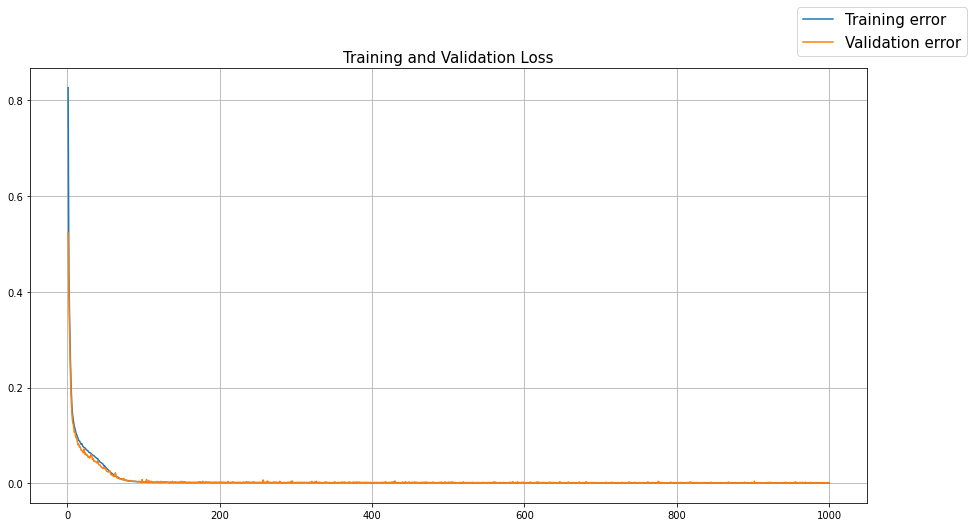

In [ ]:
loss_error = History.history["loss"]
validation_error = History.history["val_loss"]
epochs = np.arange(1, len(loss_error) + 1)

fig_train, ax_train = plt.subplots(figsize=(15,8))
ax_train.set_title('Training and Validation Loss', fontsize=15)
ax_train.plot(epochs, loss_error, label="Training error")
ax_train.plot(epochs, validation_error, label="Validation error")
ax_train.grid()
fig_train.legend(fontsize=15)

In [ ]:
print(f"train_error = {loss_error[-1]}\nvalidation_error = {validation_error[-1]}")

train_error = 0.0012689715949818492
 validation_error = 0.0015748321311548352


## Test

In [ ]:
loss_test_error, metrics_test_error = model.evaluate(Xts, yts)
print(f"loss_test_error = {loss_test_error}\nmetrics_test_error = {metrics_test_error}") 

6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
loss_test_error = 0.0013820781605318189
 metrics_test_error = 0.0013820781605318189


###Prediction

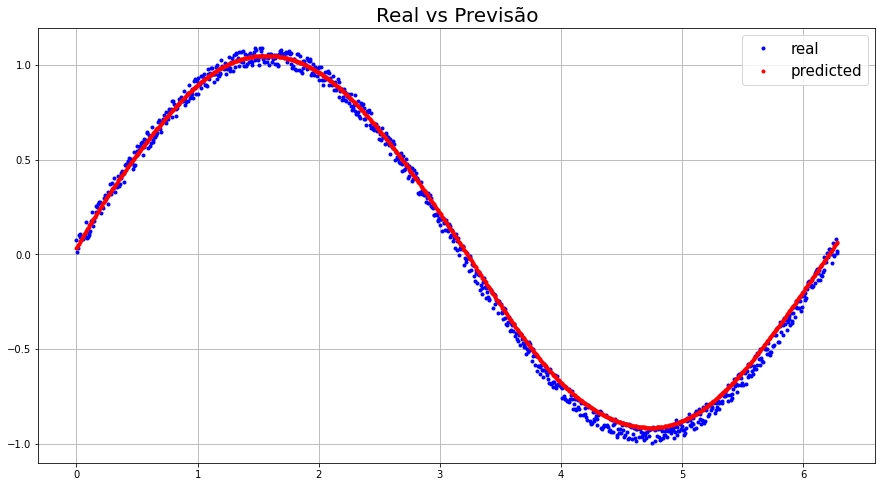

In [ ]:
output = model.predict(t)

plt.figure(figsize=(15,8))
plt.plot(t_permuted, y_permuted, 'b.', label = "real")
plt.plot(t, output, "r.", label = "predicted")
plt.title("Real vs Previsão", fontsize=20)
plt.grid()
plt.legend(fontsize=15)

## Outliers

Agora, além do ruído vamos adicionar algun outliers de forma a dificultar ainda mais o aprendizado do modelo.